# Workshop 04: Spatial Analytics

Content:
1. GeoPandas (incl. shapely)
1. H3-Library to discretize an area
1. Kepler GL to interactively visualize spatial data 


## GeoPandas:
Official Documentation: https://geopandas.org/data_structures.html

    
GeoPandas implements two main data structures, a **GeoSeries** and a **GeoDataFrame**. 
These are subclasses of pandas **Series** and **DataFrame**, respectively.

### GeoSeries

A GeoSeries is essentially a vector where each entry in the vector is a set of shapes corresponding to one observation.

#### Geometry Objects
geopandas has three basic classes of geometric objects (which are actually **shapely** objects):

1. Points / Multi-Points
2. Lines / Multi-Lines
3. polygons / Multi-Polygons

Note that all entries in a GeoSeries need not be of the same geometric type, although certain export operations will fail if this is not the case.



#### Overview of Attributes and Methods 
The GeoSeries class implements nearly all of the attributes and methods of Shapely objects. 
When applied to a GeoSeries, they will apply elementwise to all geometries in the series.

##### Attributes

* area: shape area (units of projection – see projections)
* bounds: tuple of max and min coordinates on each axis for each shape
* total_bounds: tuple of max and min coordinates on each axis for entire GeoSeries
* geom_type: type of geometry.
* is_valid: tests if coordinates make a shape that is reasonable geometric shape.

##### Basic Methods

* distance(): returns Series with minimum distance from each entry to other
* centroid: returns GeoSeries of centroids
* representative_point(): returns GeoSeries of points that are guaranteed to be within each geometry. It does NOT * return centroids.
* to_crs(): change coordinate reference system. See projections
* plot(): plot GeoSeries. See mapping.


##### Relationship Tests

*  geom_almost_equals(): is shape almost the same as other (good when floating point precision issues make shapes slightly different)
* contains(): is shape contained within other
* intersects(): does shape intersect other


### GeoDataFrame

A **GeoDataFrame** is a tabular data structure that contains a GeoSeries.

The most important property of a GeoDataFrame is that it always has **one** GeoSeries column that holds a special status. This GeoSeries is referred to as the GeoDataFrame’s **“geometry”**. When a spatial method is applied to a GeoDataFrame (or a spatial attribute like area is called), this commands will always act on the “geometry” column.



#### Example 

In [75]:
import geopandas 

world = geopandas.read_file('../data/ne_110m_admin_0_countries.zip')

# eyeball geopandas data frame
world.head()

,featurecla,scalerank,LABELRANK,SOVEREIGNT,SOV_A3,ADM0_DIF,LEVEL,TYPE,TLC,ADMIN,...,FCLASS_TR,FCLASS_ID,FCLASS_PL,FCLASS_GR,FCLASS_IT,FCLASS_NL,FCLASS_SE,FCLASS_BD,FCLASS_UA,geometry
0,Admin-0 country,1,6,Fiji,FJI,0,2,Sovereign country,1,Fiji,...,None,None,None,None,None,None,None,None,None,"MULTIPOLYGON (((180 -16.067132664, 180 -16.555..."
1,Admin-0 country,1,3,United Republic of Tanzania,TZA,0,2,Sovereign country,1,United Republic of Tanzania,...,None,None,None,None,None,None,None,None,None,"POLYGON ((33.903711197 -0.95, 34.07262 -1.0598..."
2,Admin-0 country,1,7,Western Sahara,SAH,0,2,Indeterminate,1,Western Sahara,...,Unrecognized,Unrecognized,Unrecognized,None,None,Unrecognized,None,None,None,"POLYGON ((-8.665589565 27.65642589, -8.6651244..."
3,Admin-0 country,1,2,Canada,CAN,0,2,Sovereign country,1,Canada,...,None,None,None,None,None,None,None,None,None,"MULTIPOLYGON (((-122.84 49, -122.97421 49.0025..."
4,Admin-0 country,1,2,United States of America,US1,1,2,Country,1,United States of America,...,None,None,None,None,None,None,None,None,None,"MULTIPOLYGON (((-122.84 49, -120 49, -117.0312..."


<Axes: >

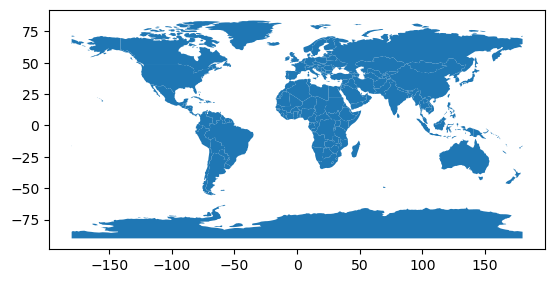

In [7]:
# Plot Spatial Data
world.plot()

In [8]:
# Adjusting the geometry column
world.geometry

0      MULTIPOLYGON (((180 -16.06713, 180 -16.55522, ...
1      POLYGON ((33.90371 -0.95, 34.07262 -1.05982, 3...
2      POLYGON ((-8.66559 27.65643, -8.66512 27.58948...
3      MULTIPOLYGON (((-122.84 49, -122.97421 49.0025...
4      MULTIPOLYGON (((-122.84 49, -120 49, -117.0312...
                             ...                        
172    POLYGON ((18.82982 45.90887, 18.82984 45.90888...
173    POLYGON ((20.0707 42.58863, 19.80161 42.50009,...
174    POLYGON ((20.59025 41.85541, 20.52295 42.21787...
175    POLYGON ((-61.68 10.76, -61.105 10.89, -60.895...
176    POLYGON ((30.83385 3.50917, 29.9535 4.1737, 29...
Name: geometry, Length: 177, dtype: geometry

In [9]:
# First rename column, second set geometry column -> You have to set the geometry everytime you change the name.
world = world.rename(columns={'geometry': 'borders'}).set_geometry('borders')

world.geometry.name

'borders'

/var/folders/tm/rzk5w14x43s6q7sgpkq2r7wc0000gn/T/ipykernel_9969/3851898985.py:1: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  world['centroid_column'] = world.centroid


<Axes: >

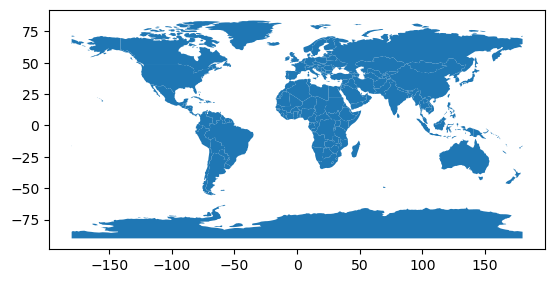

In [10]:
world['centroid_column'] = world.centroid

world.plot()

<Axes: >

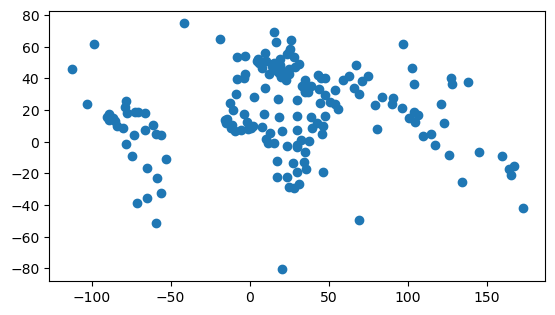

In [12]:
# Compute centroid and use as geometry column

world = world.set_geometry('centroid_column')

world.plot()

# note that the active geometry column has changed

#### Display options 

In [13]:
import geopandas
geopandas.options

Options(
  display_precision: None [default: None]
      The precision (maximum number of decimals) of the coordinates in the
      WKT representation in the Series/DataFrame display. By default (None),
      it tries to infer and use 3 decimals for projected coordinates and 5
      decimals for geographic coordinates.
  use_pygeos: False [default: False]
      Deprecated option previously used to enable PyGEOS. It will be removed
      in GeoPandas 1.1.
  io_engine: None [default: None]
      The default engine for ``read_file`` and ``to_file``. Options are
      'pyogrio' and 'fiona'.
  )

In [14]:
# Before changing options 
world['centroid_column'].head()

0    POINT (163.85316 -17.31631)
1      POINT (34.75299 -6.25773)
2     POINT (-12.13783 24.29117)
3     POINT (-98.14238 61.46908)
4    POINT (-112.59944 45.70563)
Name: centroid_column, dtype: geometry

In [15]:
# After changing options
geopandas.options.display_precision = 9
world['centroid_column'].head()

0    POINT (163.853164645 -17.316309426)
1      POINT (34.752989855 -6.257732429)
2      POINT (-12.137831112 24.29117296)
3     POINT (-98.142381372 61.469076145)
4    POINT (-112.599435912 45.705628002)
Name: centroid_column, dtype: geometry

### Reading and Writing Files

Reading Spatial Data

geopandas can read almost any vector-based spatial data format including ESRI shapefile, GeoJSON files and more using the command:

geopandas.read_file()

#### Reading big data files by using geometry filters

In [22]:
# This is our filter
gdf_mask = geopandas.read_file('../data/ne_110m_admin_0_countries.zip')

# Here we load all cities but apply an filter such that we just get cities that are withing the gdf_mask geometry 
# In this example, we just get cities from Africa
gdf = geopandas.read_file('../data/ne_110m_populated_places.zip',
    mask=gdf_mask[gdf_mask.CONTINENT=='Africa']
)

In [30]:
gdf[['NAME', 'POP2025']].sort_values('POP2025', ascending=False).head()

,NAME,POP2025
56,Cairo,14451
54,Lagos,14134
51,Kinshasa,13875
46,Luanda,7153
41,Khartoum,7017


#### Writing files

In [31]:
gdf.to_file("african_cities.shp")

# or as GeoJSON

gdf.to_file("african_cities.geojson", driver='GeoJSON')


### Indexing and Selecting Data

GeoPandas inherits the **standard pandas** methods for indexing/selecting data. This includes label based indexing with .loc and integer position based indexing with .iloc, which apply to both GeoSeries and GeoDataFrame objects. For more information on indexing/selecting, see the pandas documentation.

In addition to the standard pandas methods, GeoPandas also provides **coordinate based indexing** with the cx indexer, which slices using a bounding box. Geometries in the GeoSeries or GeoDataFrame that intersect the bounding box will be returned.

Using the world dataset, we can use this functionality to quickly select all countries whose boundaries extend into the southern hemisphere.

<Axes: >

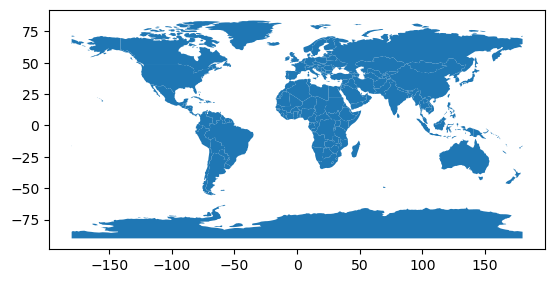

In [32]:
world = geopandas.read_file('../data/ne_110m_admin_0_countries.zip')

world.plot()

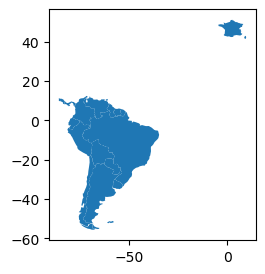

In [43]:
#xmin, xmax, ymin, ymax 
south_america = world.cx[-100:-25, -60:10]

south_america.plot(figsize=(10, 3));

That's weird, what's France doing there...?

Well, France has long-reaching territorial bounds well beyond Europe...

In [47]:
world[world.NAME == 'France'].bounds

,minx,miny,maxx,maxy
43,-54.524754,2.053389,9.560016,51.148506


## Making Maps 

In [48]:
# Load Toy data
cities = geopandas.read_file('../data/ne_110m_populated_places.zip')

### Using color schemes to visualize data

#### Choropleth Maps

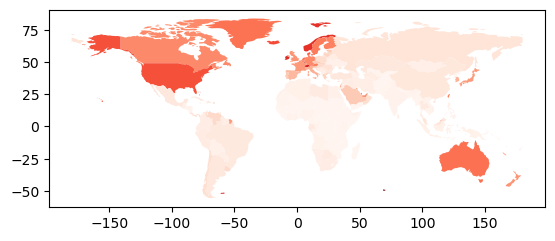

In [56]:
# Plot by GDP per capta
world = world[(world.POP_EST>0) & (world.NAME!="Antarctica")]

world.loc[:,'GDP_PER_CAP'] = world['GDP_MD'] / world['POP_EST']

world.plot(column='GDP_PER_CAP', cmap='Reds');

#### Plotting with a legend

<Axes: >

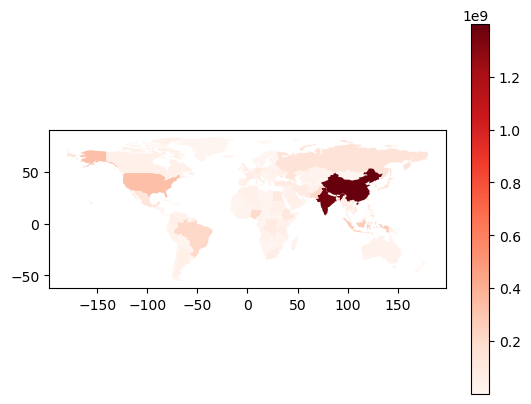

In [66]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 1)

world.plot(column='POP_EST', cmap='Reds', ax=ax, legend=True)

<Axes: >

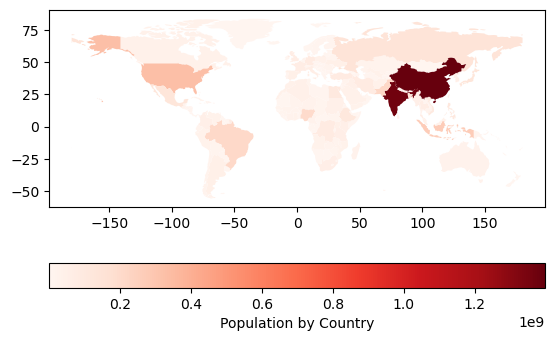

In [68]:
# or horizontally 
fig, ax = plt.subplots(1, 1)
world.plot(column='POP_EST', cmap='Reds', ax=ax,legend=True, legend_kwds={'label': "Population by Country",'orientation': "horizontal"})


#### Changing the default coloring

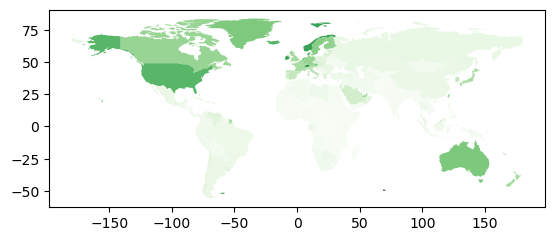

In [69]:
# By adding a colormap
# Here you can find many colormaps: https://matplotlib.org/3.1.1/tutorials/colors/colormaps.html
world.plot(column='GDP_PER_CAP', cmap='Greens');

<Axes: >

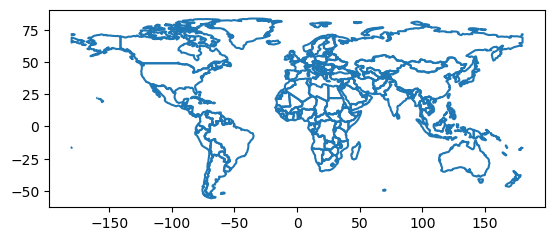

In [70]:
#### Plotting only the boundaries of geometries
world.boundary.plot()

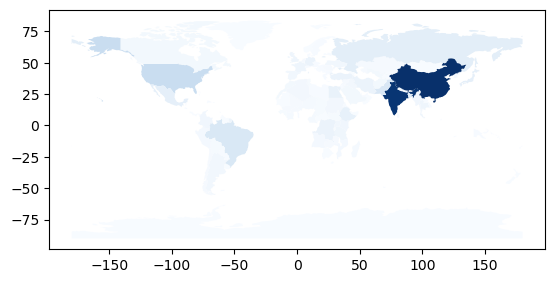

In [80]:
#### Plotting missing data
import numpy as np

world.loc[np.random.choice(world.index, 40), 'POP_EST'] = np.nan

# By default these features are ignored
world.plot(column='POP_EST', cmap='Blues');


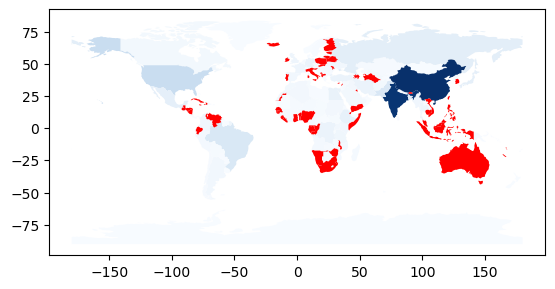

In [81]:
# But we can specfiy a color for missing values
world.plot(column='POP_EST', cmap='Blues', missing_kwds={'color': 'red'});

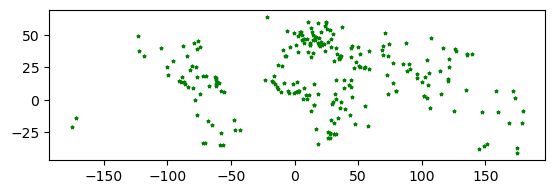

In [82]:
#### Maps with multiple layers (i.e., multiple data sources)

# Second data set 
cities.plot(marker='*', color='green', markersize=5);

cities = cities.to_crs(world.crs)

# Idea: Overlay two plots

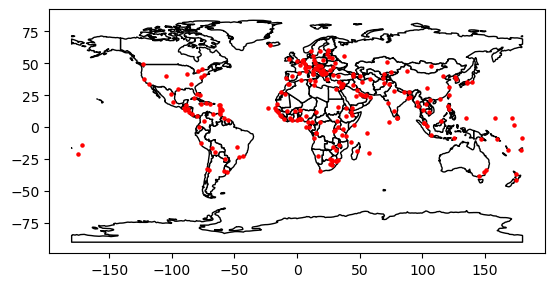

In [83]:
# Plotting two layers
base = world.plot(color='white', edgecolor='black') # This returns an axes object as we have learnt in workshop 2
cities.plot(ax=base, marker='o', color='red', markersize=5);

/var/folders/tm/rzk5w14x43s6q7sgpkq2r7wc0000gn/T/ipykernel_9969/2012049629.py:3: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  world.centroid.plot(ax=base, marker='o', color='red', markersize=5);


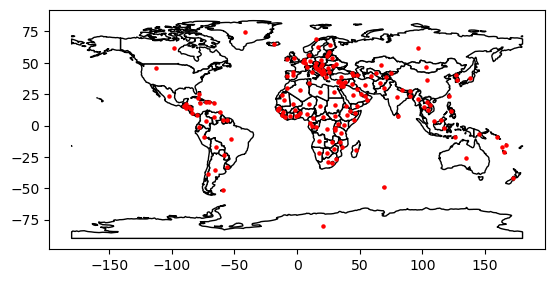

In [84]:
# Plot the centroids 
base = world.plot(color='white', edgecolor='black') # This returns an axes object as we have learnt in workshop 2
world.centroid.plot(ax=base, marker='o', color='red', markersize=5);

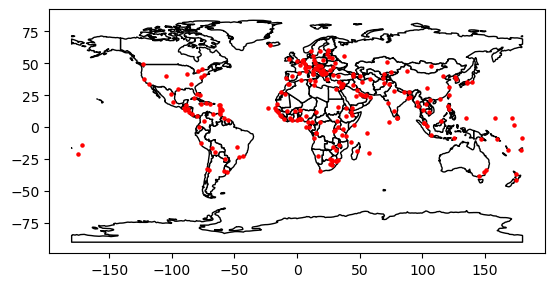

In [85]:
# or, a more "sophisticated" approach: 
import matplotlib.pyplot as plt


fig, ax = plt.subplots()

world.plot(ax=ax, color='white', edgecolor='black')
cities.plot(ax=ax, marker='o', color='red', markersize=5)

plt.show();

#### Control the order of multiple layers in a plot

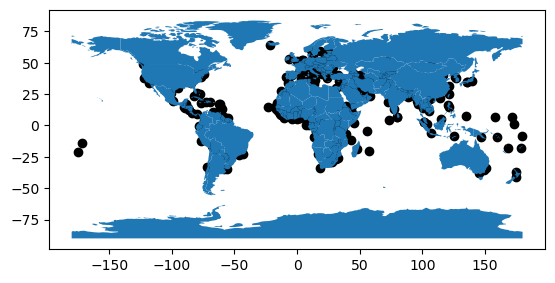

In [86]:
ax = cities.plot(color='k')
world.plot(ax=ax);

# Not very meaningful visualization.

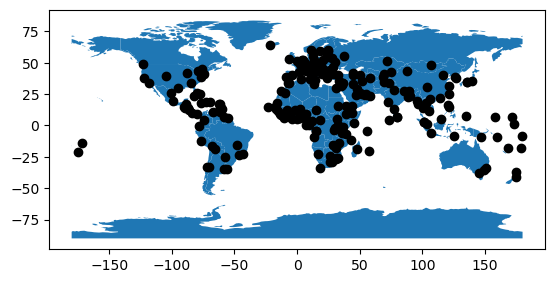

In [87]:
ax = cities.plot(color='k', zorder=2)
world.plot(ax=ax, zorder=1);

# Much better

### Managing Coordinate Reference System
Coordinate Reference Systems

The Coordinate Reference System (CRS) is important because the geometric shapes in a GeoSeries or GeoDataFrame object are simply a collection of coordinates in an arbitrary space. A CRS tells Python how those coordinates relate to places on the Earth.

You can find the codes for most commonly used projections from www.spatialreference.org.

The same CRS can often be referred to in many ways. For example, one of the most commonly used CRS is the WGS84 latitude-longitude projection. This can be referred to using the authority code "EPSG:4326".

#### Setting a CRS manually

In [88]:
# But most of the time we don't need to this because this information is available in the input data.
cities.crs = "EPSG:4326" 

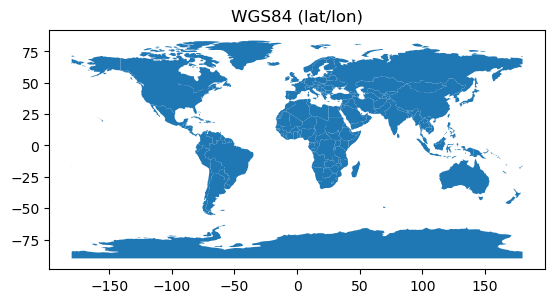

In [89]:
#### Transforming to different projection

world.crs # EPSG:4326 <-> WGS 84 most commonly used system

ax = world.plot()

ax.set_title("WGS84 (lat/lon)");

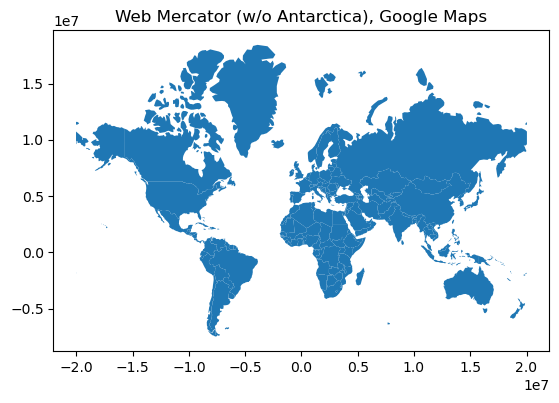

In [94]:
# Projecting it to mercator projection
world_merc = world[world.NAME!="Antarctica"].to_crs("EPSG:3857") 
ax = world_merc.plot()

ax.set_title("Web Mercator (w/o Antarctica), Google Maps");

### Geometric Manipulations 

**GeoSeries.buffer(distance, resolution=16)**
Returns a GeoSeries of geometries representing all points within a given distance of each geometric object.

**GeoSeries.boundary**
Returns a GeoSeries of lower dimensional objects representing each geometries’s set-theoretic boundary.

**GeoSeries.centroid**
Returns a GeoSeries of points for each geometric centroid.

**GeoSeries.convex_hull**
Returns a GeoSeries of geometries representing the smallest convex Polygon containing all the points in each object unless the number of points in the object is less than three. For two points, the convex hull collapses to a LineString; for 1, a Point.

**GeoSeries.envelope**
Returns a GeoSeries of geometries representing the point or smallest rectangular polygon (with sides parallel to the coordinate axes) that contains each object.

**GeoSeries.simplify(tolerance, preserve_topology=True)**
Returns a GeoSeries containing a simplified representation of each object.

**GeoSeries.unary_union**
Return a geometry containing the union of all geometries in the GeoSeries.


### Affine Transformation

**GeoSeries.affine_transform(self, matrix)**
Transform the geometries of the GeoSeries using an affine transformation matrix

**GeoSeries.rotate(self, angle, origin='center', use_radians=False)**
Rotate the coordinates of the GeoSeries.

**GeoSeries.scale(self, xfact=1.0, yfact=1.0, zfact=1.0, origin='center')**
Scale the geometries of the GeoSeries along each (x, y, z) dimensio.

**GeoSeries.skew(self, angle, origin='center', use_radians=False)**
Shear/Skew the geometries of the GeoSeries by angles along x and y dimensions.

**GeoSeries.translate(self, xoff=0.0, yoff=0.0, zoff=0.0)**
Shift the coordinates of the GeoSeries.




<Axes: >

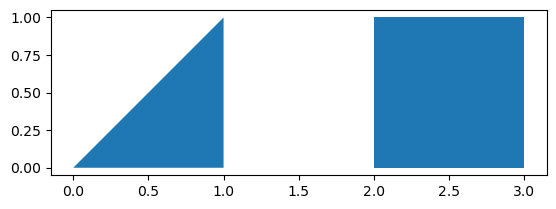

In [96]:
# Create Toy Data

from geopandas import GeoSeries
from shapely.geometry import Polygon
p1 = Polygon([(0, 0), (1, 0), (1, 1)])
p2 = Polygon([(2, 0), (3, 0), (3, 1), (2, 1)])
g = GeoSeries([p1, p2])
g.plot()

In [97]:
# Area of objects
g.area

0    0.5
1    1.0
dtype: float64

<Axes: >

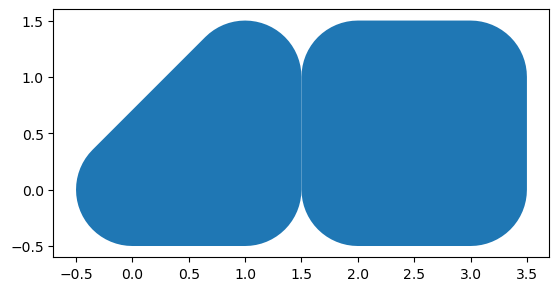

In [98]:
g.buffer(0.5).plot()

In [101]:
# Example 2: NY districts
from geodatasets import get_path
nybb_path = get_path('nybb')

boroughs = geopandas.read_file(nybb_path)
boroughs.set_index('BoroCode', inplace=True)
boroughs.sort_index(inplace=True)
boroughs


Extracting 'nybb_16a/nybb.shp' from '/Users/janik/Library/Caches/geodatasets/nybb_16a.zip' to '/Users/janik/Library/Caches/geodatasets/nybb_16a.zip.unzip'
Extracting 'nybb_16a/nybb.shx' from '/Users/janik/Library/Caches/geodatasets/nybb_16a.zip' to '/Users/janik/Library/Caches/geodatasets/nybb_16a.zip.unzip'
Extracting 'nybb_16a/nybb.dbf' from '/Users/janik/Library/Caches/geodatasets/nybb_16a.zip' to '/Users/janik/Library/Caches/geodatasets/nybb_16a.zip.unzip'
Extracting 'nybb_16a/nybb.prj' from '/Users/janik/Library/Caches/geodatasets/nybb_16a.zip' to '/Users/janik/Library/Caches/geodatasets/nybb_16a.zip.unzip'


,BoroName,Shape_Leng,Shape_Area,geometry
BoroCode,,,,
1,Manhattan,359299.096471,6.364715e+08,MULTIPOLYGON (((981219.055786133 188655.315795...
2,Bronx,464392.991824,1.186925e+09,MULTIPOLYGON (((1012821.805786133 229228.26458...
3,Brooklyn,741080.523166,1.937479e+09,MULTIPOLYGON (((1021176.479003906 151374.79699...
4,Queens,896344.047763,3.045213e+09,MULTIPOLYGON (((1029606.076599121 156073.81420...
5,Staten Island,330470.010332,1.623820e+09,MULTIPOLYGON (((970217.022399902 145643.332214...


<Axes: >

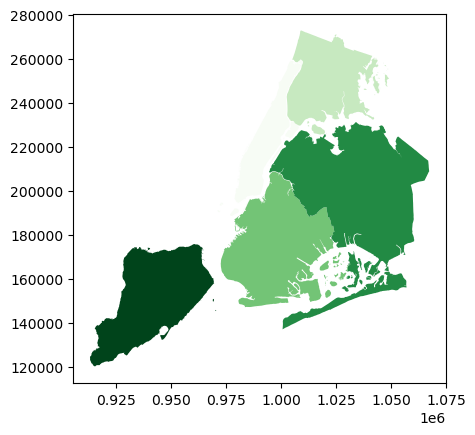

In [102]:
# Plot NY districts
boroughs.plot(cmap="Greens")

<Axes: >

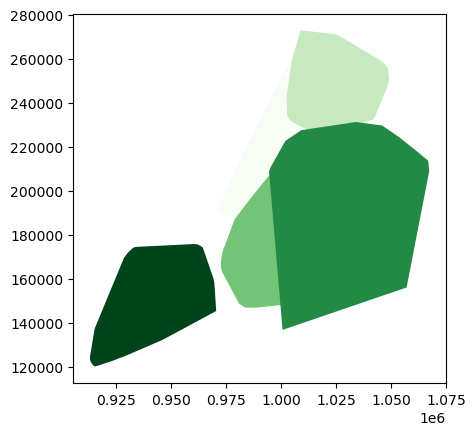

In [103]:
# Compute the convex hull
boroughs['geometry'].convex_hull.plot(cmap="Greens")

In [104]:
#### A more complex operation with random "mobility data":

import numpy as np
from shapely.geometry import Point
xmin, xmax, ymin, ymax = 900000, 1080000, 120000, 280000
xc = (xmax - xmin) * np.random.random(2000) + xmin
yc = (ymax - ymin) * np.random.random(2000) + ymin
pts = GeoSeries([Point(x, y) for x, y in zip(xc, yc)])

In [105]:
# Compute a buffer around each vehicle
circles = pts.buffer(2000)

In [108]:
# Compute unary union
mp = circles.union_all()

In [109]:
type(mp)

shapely.geometry.multipolygon.MultiPolygon

In [110]:
# This is one single shapley! object. 
mp

<Axes: >

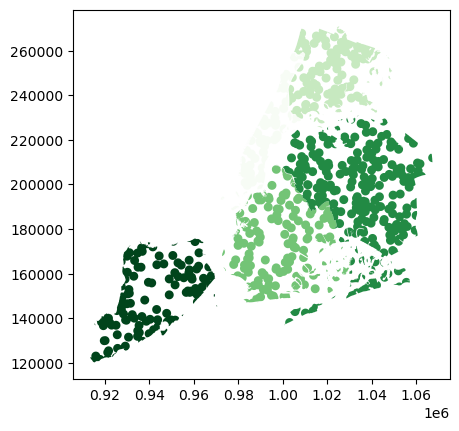

In [111]:
# Computing the intersection 
holes = boroughs['geometry'].intersection(mp) # N - 1 

holes.plot(cmap="Greens")

<Axes: >

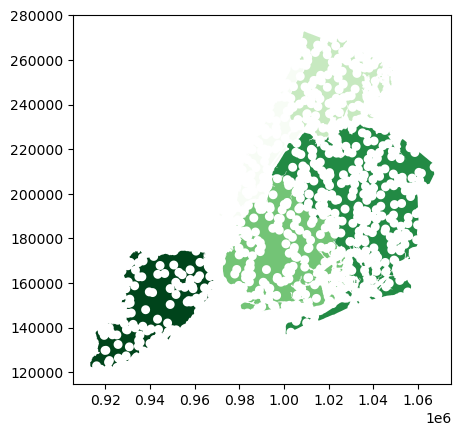

In [112]:
# Or the difference
boroughs_with_holes = boroughs['geometry'].difference(mp)

boroughs_with_holes.plot(cmap="Greens")

### Set-Operations with Overlay

When working with multiple spatial datasets – especially multiple polygon or line datasets – users often wish to create new shapes based on places where those datasets overlap (or don’t overlap). These manipulations are often referred using the language of sets – intersections, unions, and differences. These types of operations are made available in the geopandas library through the overlay function.

In [113]:
from shapely.geometry import Polygon

polys1 = geopandas.GeoSeries([Polygon([(0,0), (2,0), (2,2), (0,2)]),
                              Polygon([(2,2), (4,2), (4,4), (2,4)])])


polys2 = geopandas.GeoSeries([Polygon([(1,1), (3,1), (3,3), (1,3)]),
                              Polygon([(3,3), (5,3), (5,5), (3,5)])])


df1 = geopandas.GeoDataFrame({'geometry': polys1, 'df1':[1,2]})

df2 = geopandas.GeoDataFrame({'geometry': polys2, 'df2':[1,2]})

df1

,geometry,df1
0,"POLYGON ((0 0, 2 0, 2 2, 0 2, 0 0))",1
1,"POLYGON ((2 2, 4 2, 4 4, 2 4, 2 2))",2


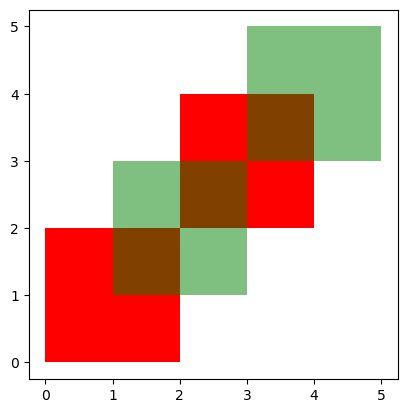

In [114]:
# Plot to y data
ax = df1.plot(color='red');

df2.plot(ax=ax, color='green', alpha=0.5);

In [115]:
# Union Operator
res_union = geopandas.overlay(df1, df2, how='union')

In [116]:
res_union.head(10)

,df1,df2,geometry
0,1.0,1.0,"POLYGON ((2 2, 2 1, 1 1, 1 2, 2 2))"
1,2.0,1.0,"POLYGON ((2 2, 2 3, 3 3, 3 2, 2 2))"
2,2.0,2.0,"POLYGON ((4 4, 4 3, 3 3, 3 4, 4 4))"
3,1.0,NaN,"POLYGON ((2 0, 0 0, 0 2, 1 2, 1 1, 2 1, 2 0))"
4,2.0,NaN,"MULTIPOLYGON (((3 4, 3 3, 2 3, 2 4, 3 4)), ((4..."
5,NaN,1.0,"MULTIPOLYGON (((2 3, 2 2, 1 2, 1 3, 2 3)), ((3..."
6,NaN,2.0,"POLYGON ((3 5, 5 5, 5 3, 4 3, 4 4, 3 4, 3 5))"


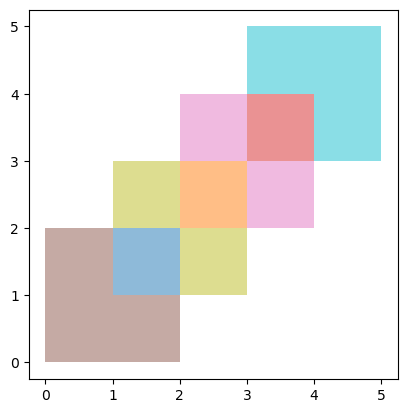

In [117]:
# Vis. union
ax = res_union.plot(alpha=0.5, cmap='tab10')

# Color the edges
#df1.plot(ax=ax, facecolor='none', edgecolor='k');
#df1.plot(ax=ax, facecolor='none', edgecolor='k');

### Task 3: Intersection, Difference, Symmetrical Difference of Geometries

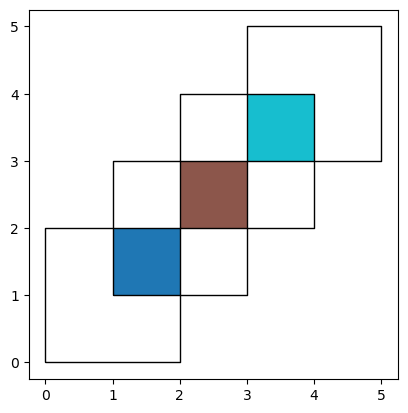

In [118]:
# Intersection
res_intersection = geopandas.overlay(df1, df2, how='intersection')

ax = res_intersection.plot(cmap='tab10')

df1.plot(ax=ax, facecolor='none', edgecolor='k');

df2.plot(ax=ax, facecolor='none', edgecolor='k');

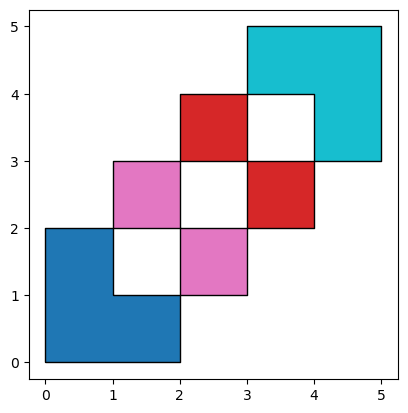

In [119]:
# Sym. Difference
res_symdiff = geopandas.overlay(df1, df2, how='symmetric_difference')

ax = res_symdiff.plot(cmap='tab10')

df1.plot(ax=ax, facecolor='none', edgecolor='k');

df2.plot(ax=ax, facecolor='none', edgecolor='k');

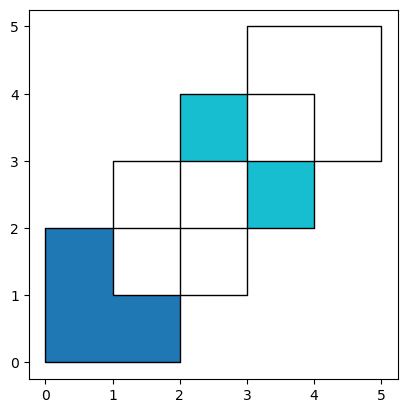

In [120]:
# Difference
res_difference = geopandas.overlay(df1, df2, how='difference')

ax = res_difference.plot(cmap='tab10')

df1.plot(ax=ax, facecolor='none', edgecolor='k');

df2.plot(ax=ax, facecolor='none', edgecolor='k');

### Aggregration with dissolve (SQL Equivalent: GroupBy)

Aggregation with dissolve

Spatial data are often more granular than we need. For example, we might have data on sub-national units, but we’re actually interested in studying patterns at the level of countries.

In a non-spatial setting, when all we need are summary statistics of the data, we aggregate our data using the **groupby** function. But for spatial data, we sometimes also need to aggregate geometric features. In the geopandas library, we can aggregate geometric features using the dissolve function.

dissolve can be thought of as doing three things: (a) it dissolves all the geometries within a given group together into a single geometric feature (using the unary_union method), and (b) it aggregates all the rows of data in a group using groupby.aggregate(), and (c) it combines those two results.



In [121]:
world = world[['CONTINENT', 'geometry', 'NAME']]

world.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 177 entries, 0 to 176
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   CONTINENT  177 non-null    object  
 1   geometry   177 non-null    geometry
 2   NAME       177 non-null    object  
dtypes: geometry(1), object(2)
memory usage: 4.3+ KB


In [122]:
world.head(15)

,CONTINENT,geometry,NAME
0,Oceania,"MULTIPOLYGON (((180 -16.067132664, 180 -16.555...",Fiji
1,Africa,"POLYGON ((33.903711197 -0.95, 34.07262 -1.0598...",Tanzania
2,Africa,"POLYGON ((-8.665589565 27.65642589, -8.6651244...",W. Sahara
3,North America,"MULTIPOLYGON (((-122.84 49, -122.97421 49.0025...",Canada
4,North America,"MULTIPOLYGON (((-122.84 49, -120 49, -117.0312...",United States of America
5,Asia,"POLYGON ((87.359970331 49.214980781, 86.598776...",Kazakhstan
6,Asia,"POLYGON ((55.968191359 41.308641669, 55.928917...",Uzbekistan
7,Oceania,"MULTIPOLYGON (((141.000210403 -2.600151056, 14...",Papua New Guinea
8,Asia,"MULTIPOLYGON (((141.000210403 -2.600151056, 14...",Indonesia
9,South America,"MULTIPOLYGON (((-68.634010228 -52.636370459, -...",Argentina


In [123]:
# "GroupBy" Continent and merge geometries
continents = world.dissolve(by='CONTINENT')

In [124]:
# GroupedBy/Dissolved Geometries
continents.head(10)

,geometry,NAME
CONTINENT,,
Africa,"MULTIPOLYGON (((-11.438779466 6.785916856, -11...",Tanzania
Antarctica,"MULTIPOLYGON (((-61.138975796 -79.981370945, -...",Antarctica
Asia,"MULTIPOLYGON (((48.679230585 14.003202419, 48....",Kazakhstan
Europe,"MULTIPOLYGON (((-53.55483924 2.334896552, -53....",Russia
North America,"MULTIPOLYGON (((-155.22217 19.23972, -155.5421...",Canada
Oceania,"MULTIPOLYGON (((147.914051955 -43.211522312, 1...",Fiji
Seven seas (open ocean),"POLYGON ((68.935 -48.625, 69.58 -48.94, 70.525...",Fr. S. Antarctic Lands
South America,"MULTIPOLYGON (((-68.639990811 -55.580017999, -...",Argentina


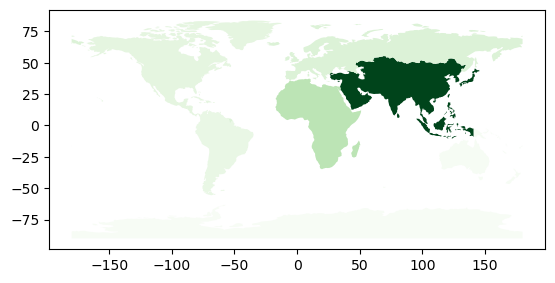

In [125]:
# Population - Continent Level
world = geopandas.read_file('../data/ne_110m_admin_0_countries.zip')

world = world[['CONTINENT', 'geometry', 'POP_EST']]

continents = world.dissolve(by='CONTINENT', aggfunc='sum')

continents.plot(column = 'POP_EST', cmap='Greens')

# Equivalent SQL:

# SELECT union(geometry), sum(population) from table naturalearth_lowres group by continent;

### Merging Data (SQL Equivalent: Join)

Both spatial and attribute joins are supported. Attribute joins are done in the same way as in with regular pandas.

Spatial Join are used to join "spatially" related data.

In [60]:
world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))

cities = geopandas.read_file(geopandas.datasets.get_path('naturalearth_cities'))

# For attribute join
country_shapes = world[['geometry', 'iso_a3']]

country_names = world[['name', 'iso_a3']]

# For spatial join
countries = world[['geometry', 'name']]

countries = countries.rename(columns={'name':'country'})

In [61]:
# Eyeball cities
cities.head()

,name,geometry
0,Vatican City,POINT (12.453386500 41.903282200)
1,San Marino,POINT (12.441770200 43.936095800)
2,Vaduz,POINT (9.516669500 47.133723800)
3,Lobamba,POINT (31.199997100 -26.466667500)
4,Luxembourg,POINT (6.130002800 49.611660400)


In [62]:
# Execute spatial join (merge both data frames bases on spatial relationship)
# How: Inner, Left, Right 
# Op: intersects (intersection is not empty), within (is within the other object's interior), contains (contains the other objects)
cities_with_country = geopandas.sjoin(cities, countries, how="inner", op='intersects')

/Users/raminahadi/opt/anaconda3/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3377: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if (await self.run_code(code, result,  async_=asy)):


In [63]:
cities_with_country.head()

,name,geometry,index_right,country
0,Vatican City,POINT (12.453386500 41.903282200),141,Italy
1,San Marino,POINT (12.441770200 43.936095800),141,Italy
226,Rome,POINT (12.481312600 41.897901500),141,Italy
2,Vaduz,POINT (9.516669500 47.133723800),114,Austria
212,Vienna,POINT (16.364693100 48.201961100),114,Austria


#### Missing and Empty Geometries: 

1. Empty geometries = real geometry objects but with no coordinates (e.g., intersection of polygons without any intersecting point)
2. Missing geometries = None values 

## H3 - Hierarchical Discretization with Hexagons

Source:
1. https://www.google.com/search?client=safari&rls=en&q=source+h3&ie=UTF-8&oe=UTF-8
2. https://eng.uber.com/h3/ 
3. Documentation: https://h3geo.org/#/

<img src="./resources/img1.png">

In [126]:
import json
city_bounding_box = geopandas.read_file('./resources/berlin_bounding_box.geojson')
city_bounding_box_json_string = city_bounding_box.to_json()
city_bounding_box_json = json.loads(city_bounding_box_json_string)
city_bounding_box_poly = city_bounding_box_json["features"][0]

<Axes: >

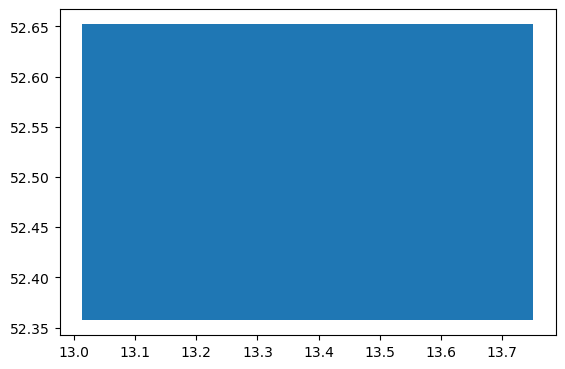

In [127]:
city_bounding_box.plot()

In [128]:
# Valid GeoJSON object
city_bounding_box_poly

{'id': '0',
 'type': 'Feature',
 'properties': {},
 'geometry': {'type': 'Polygon',
  'coordinates': [[[13.0133056640625, 52.35715118125809],
    [13.750762939453125, 52.35715118125809],
    [13.750762939453125, 52.65222859561964],
    [13.0133056640625, 52.65222859561964],
    [13.0133056640625, 52.35715118125809]]]}}

In [ ]:
h3.polygon_to_cells()

In [135]:
import h3 
from shapely.geometry import shape

# Computing hexagons for a given polygon
H3_HEXAGON_RESOLUTION = 6
polygon_obj = city_bounding_box_poly["geometry"] # your geo json object
hexagons = h3.geo_to_cells(polygon_obj, res = H3_HEXAGON_RESOLUTION)

In [137]:
# Returns only the index of each hexagon, not the geometries
hexagons[:3]

['861f1d497ffffff', '861f1894fffffff', '861f18b47ffffff']

In [152]:
# We can also convert back
h3.cells_to_geo(['861f1d497ffffff'])

{'type': 'Polygon',
 'coordinates': (((13.178719820832706, 52.517247677720285),
   (13.163330744658229, 52.48752152873303),
   (13.20047830711998, 52.46684043659969),
   (13.2530244101177, 52.47587671883546),
   (13.26845564162329, 52.505600983275485),
   (13.231298638968873, 52.52629085774111),
   (13.178719820832706, 52.517247677720285)),)}

In [154]:
# Convert H3 Indexes to Geometry Objects
# Create geo data frame
df = geopandas.GeoDataFrame(list(hexagons), columns=['h3_hex_id'])

df['h3_hex_geo'] = df[(df['h3_hex_id'].notna())].apply(lambda row: shape(h3.cells_to_geo([row["h3_hex_id"]])), axis=1)
df = df.set_geometry('h3_hex_geo')

<Axes: >

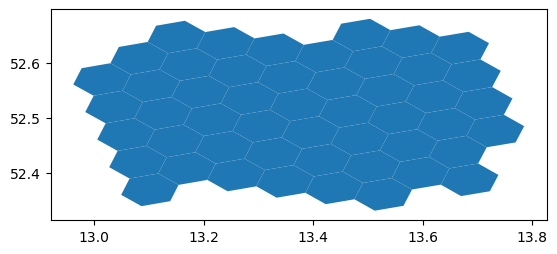

In [149]:
df.plot()

## Programming Task: Choropleth of Trips using Cells

We want to achieve something similar to the picture series below: 

<img src="./resources/img2.png">

In [166]:
# Assume we have a dataframe with a column for latitude and longitude representing "point data" for starts and ends
import pandas as pd
trips = pd.read_csv('../data/trips.csv')

In [165]:
trips

,id,provider,vehicleType,datetime_start,datetime_end,longitude_start,latitude_start,longitude_end,latitude_end
0,YmlrZTo6Y2FsbGFiaWtlOjoxNzgyNDM=,callabike,bicycle,2019-10-13 09:43:08+02:00,2019-10-13 10:18:07+02:00,13.373544,52.509953,13.390235,52.489727
1,16268nextbike,nextbike,bycicle,2019-10-14 11:52:00+02:00,2019-10-14 12:35:00+02:00,13.406048,52.524962,13.399155,52.504241
2,16305nextbike,nextbike,bycicle,2020-01-13 11:28:00+01:00,2020-01-13 12:02:00+01:00,13.394186,52.507561,13.325732,52.462790
3,15361nextbike,nextbike,bycicle,2019-10-06 21:51:00+02:00,2019-10-06 22:14:00+02:00,13.418204,52.490397,13.376718,52.487904
4,14529nextbike,nextbike,bycicle,2019-10-12 17:55:00+02:00,2019-10-12 18:45:00+02:00,13.416839,52.549147,13.444498,52.485126
...,...,...,...,...,...,...,...,...,...
17459,ZnJlZWZsb2F0Ojpkcml2ZW5vdzo6V01XV0c3MTAzMDNFNT...,drivenow,car,2019-12-16 18:53:26+01:00,2019-12-16 19:23:09+01:00,13.297930,52.500898,13.270539,52.510636
17460,ZnJlZWZsb2F0OjpjYXIyZ286OldNRTQ1MzM0MjFLMzIyNjY3,car2go,car,2019-12-06 13:18:46+01:00,2019-12-06 14:03:07+01:00,13.374310,52.507060,13.300790,52.513520
17461,ZnJlZWZsb2F0Ojpkcml2ZW5vdzo6V01XWFM1MTAyMDJIMT...,drivenow,car,2019-11-29 16:38:28+01:00,2019-11-29 18:58:07+01:00,13.322898,52.511216,13.321236,52.511161
17462,ZnJlZWZsb2F0Ojpkcml2ZW5vdzo6V01XWE01MTA0MDJIMj...,drivenow,car,2019-10-02 09:23:08+02:00,2019-10-02 10:03:07+02:00,13.325170,52.501885,13.439742,52.500465


In [167]:
H3_HEXAGON_RESOLUTION = 8

Your task is to discretize starts and ends to a a h3 grid of resolution `H3_HEXAGON_RESOLUTION` and plot the counts of starts and ends per cell side by side in two plots.

Optional: Put a map below the plots showing the outlines of the city the trips were collected in (_Hint:_ https://geopandas.org/en/stable/gallery/plotting_basemap_background.html)

## Interactive Visualization with Kepler.GL

You can upload `trips.csv` at https://kepler.gl/demo and play around a bit.